<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_1_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,60.410034,76.321619,33.512245,-0.001927,180.241970,180.244500,-0.002529
1,0.0,1.0,31.136544,68.374054,50.011540,0.003937,159.526076,159.521007,0.005069
2,0.0,2.0,81.057391,94.876400,58.690239,-0.000762,244.623269,244.625528,-0.002260
3,0.0,3.0,87.771552,80.653179,80.139692,-0.001767,258.562656,258.566640,-0.003984
4,0.0,4.0,64.341393,40.028917,72.101948,-0.002714,186.469543,186.473863,-0.004320
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,35.002650,20.641841,94.193833,0.008660,159.846984,159.835751,0.011233
59996,999.0,56.0,68.524439,23.035681,65.063582,-0.003835,166.619868,166.623862,-0.003994
59997,999.0,57.0,75.825505,71.857298,38.654638,-0.003284,196.334158,196.339974,-0.005816
59998,999.0,58.0,49.695181,36.294657,96.315977,0.006784,192.312599,192.304048,0.008551


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    60.410034  76.321619  33.512245  ...  180.241970  180.244500 -0.002529
      1.0    31.136544  68.374054  50.011540  ...  159.526076  159.521007  0.005069
      2.0    81.057391  94.876400  58.690239  ...  244.623269  244.625528 -0.002260
      3.0    87.771552  80.653179  80.139692  ...  258.562656  258.566640 -0.003984
      4.0    64.341393  40.028917  72.101948  ...  186.469543  186.473863 -0.004320
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   35.002650  20.641841  94.193833  ...  159.846984  159.835751  0.011233
      56.0   68.524439  23.035681  65.063582  ...  166.619868  166.623862 -0.003994
      57.0   75.825505  71.857298  38.654638  ...  196.334158  196.339974 -0.005816
      58.0   49.695181  36.294657  96.315977  ...  192.312599  192.304048  0.008551
      59.0   68.060702  46.954030  59.914846  ...  184.932557  184.930386  0.002171

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    60.410034  76.321619  33.512245  ...  180.241970  180.244500 -0.002529
      1.0    31.136544  68.374054  50.011540  ...  159.526076  159.521007  0.005069
      2.0    81.057391  94.876400  58.690239  ...  244.623269  244.625528 -0.002260
      3.0    87.771552  80.653179  80.139692  ...  258.562656  258.566640 -0.003984
      4.0    64.341393  40.028917  72.101948  ...  186.469543  186.473863 -0.004320
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   35.002650  20.641841  94.193833  ...  159.846984  159.835751  0.011233
      56.0   68.524439  23.035681  65.063582  ...  166.619868  166.623862 -0.003994
      57.0   75.825505  71.857298  38.654638  ...  196.334158  196.339974 -0.005816
      58.0   49.695181  36.294657  96.315977  ...  192.312599  192.304048  0.008551
      59.0   68.060702  46.954030  59.914846  ...  184.932557  184.930386  0.002171

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,60.410034,76.321619,33.512245,-0.001927,180.241970,180.244500,-0.002529
1,0.0,1.0,31.136544,68.374054,50.011540,0.003937,159.526076,159.521007,0.005069
2,0.0,2.0,81.057391,94.876400,58.690239,-0.000762,244.623269,244.625528,-0.002260
3,0.0,3.0,87.771552,80.653179,80.139692,-0.001767,258.562656,258.566640,-0.003984
4,0.0,4.0,64.341393,40.028917,72.101948,-0.002714,186.469543,186.473863,-0.004320
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,35.002650,20.641841,94.193833,0.008660,159.846984,159.835751,0.011233
59996,999.0,56.0,68.524439,23.035681,65.063582,-0.003835,166.619868,166.623862,-0.003994
59997,999.0,57.0,75.825505,71.857298,38.654638,-0.003284,196.334158,196.339974,-0.005816
59998,999.0,58.0,49.695181,36.294657,96.315977,0.006784,192.312599,192.304048,0.008551


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    60.410034  76.321619  33.512245  ...  180.241970  180.244500 -0.002529
      1.0    31.136544  68.374054  50.011540  ...  159.526076  159.521007  0.005069
      2.0    81.057391  94.876400  58.690239  ...  244.623269  244.625528 -0.002260
      3.0    87.771552  80.653179  80.139692  ...  258.562656  258.566640 -0.003984
      4.0    64.341393  40.028917  72.101948  ...  186.469543  186.473863 -0.004320
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   35.002650  20.641841  94.193833  ...  159.846984  159.835751  0.011233
      56.0   68.524439  23.035681  65.063582  ...  166.619868  166.623862 -0.003994
      57.0   75.825505  71.857298  38.654638  ...  196.334158  196.339974 -0.005816
      58.0   49.695181  36.294657  96.315977  ...  192.312599  192.304048  0.008551
      59.0   68.060702  46.954030  59.914846  ...  184.932557  184.930386  0.002171

[60000 rows x 7 columns]

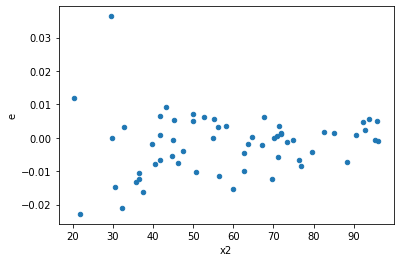

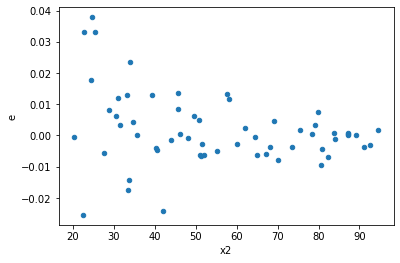

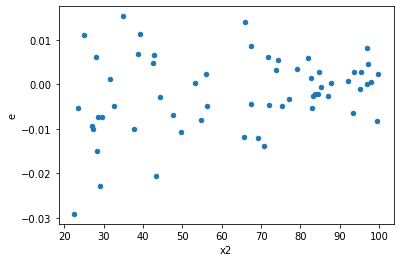

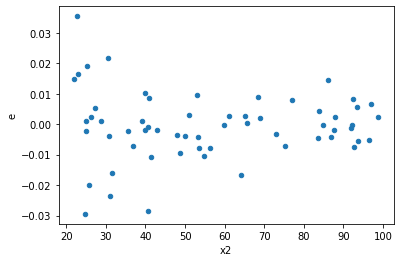

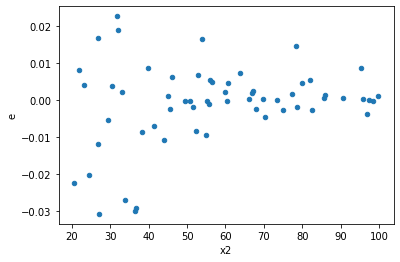

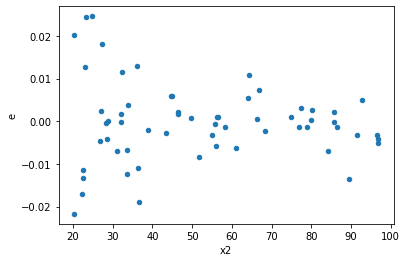

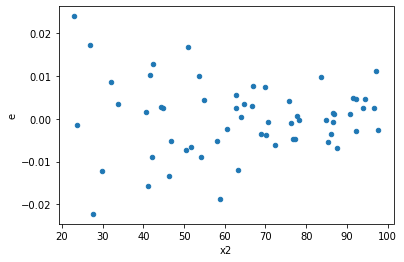

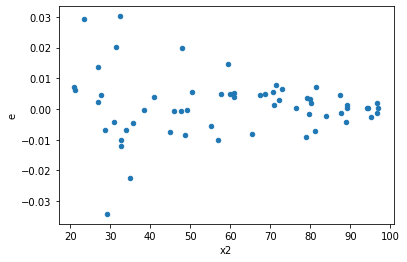

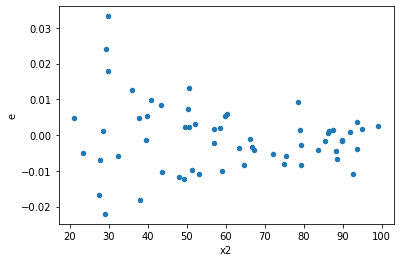

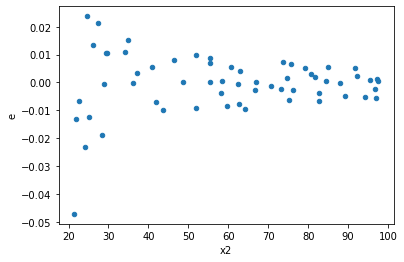

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
2.0,32.0,22.0,0.004512440183311976,0.008744668964786482,0.00014556258655845086,0.00041641280784697536,2.818767225164455,0.007542310077894632,0.9962288449610527,Reject005=0 : Heteroscedasticity
4.0,26.0,28.0,0.0027838162732007686,0.0031612756419995085,0.00011135265092803074,0.00011708428303701884,1.054477002400883,0.8952866947757294,0.5523566526121353,Reject005=1 : Homoscedasticity
7.0,29.0,25.0,0.0022658662970375188,0.0031081543697899553,8.092379632276853e-05,0.00012950643207458148,1.5912055683383723,0.22880098683684236,0.8855995065815788,Reject005=1 : Homoscedasticity
9.0,26.0,28.0,0.0005003639423033792,0.004608637230441958,2.0014557692135167e-05,0.0001706902677941466,8.55267235512398,4.6125581976141916e-07,0.9999997693720901,Reject005=0 : Heteroscedasticity
11.0,26.0,28.0,0.0024511078377290212,0.003181616997343497,9.804431350916085e-05,0.00011783766656827766,1.2053156515250003,0.6350069963601919,0.6824965018199041,Reject005=1 : Homoscedasticity
15.0,23.0,31.0,0.00039858284308620407,0.00420615122960967,1.811740195846382e-05,0.000140205040986989,7.829471092161347,3.193525759614957e-06,0.9999984032371202,Reject005=0 : Heteroscedasticity
17.0,28.0,26.0,0.0006704482196009256,0.00451539714919021,2.483141554077502e-05,0.00018061588596760838,7.2529618981314945,1.5133054138694035e-06,0.9999992433472931,Reject005=0 : Heteroscedasticity
18.0,22.0,32.0,0.0009316655831388413,0.0038636317823392144,4.436502776851625e-05,0.00012463328330126499,2.851073280402978,0.012621277677904885,0.9936893611610476,Reject005=0 : Heteroscedasticity
19.0,32.0,22.0,0.003143040812823152,0.003014275435870297,0.00010138841331687587,0.0001435369255176332,1.39495504356973,0.38267195763134954,0.8086640211843252,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,15.0,39.0,0.0020516103613203713,0.0012957100109155719,0.00014654359723716937,3.409763186619926e-05,0.24290674954359742,0.0003753314801352052,Reject005=0 : Heteroscedasticity
1.0,27.0,27.0,0.00319565241391491,0.0015257558691624293,0.00012290970822749654,5.868291804470882e-05,0.4774473789823924,0.059804494129862724,Reject005=1 : Homoscedasticity
2.0,32.0,22.0,0.004512440183311976,0.008744668964786482,0.00014556258655845086,0.00041641280784697536,2.818767225164455,0.007542310077894632,Reject005=0 : Heteroscedasticity
3.0,38.0,16.0,0.004372096505107996,0.0005942829504503285,0.00011816477040832421,3.961886336335523e-05,0.32282498926328396,0.017877291129041604,Reject005=0 : Heteroscedasticity
4.0,26.0,28.0,0.0027838162732007686,0.0031612756419995085,0.00011135265092803074,0.00011708428303701884,1.054477002400883,1.1047133052242706,Reject005=1 : Homoscedasticity
5.0,21.0,33.0,0.0077936407785310505,0.0009656392638251045,0.00038968203892655255,3.0176226994534515e-05,0.07884604009925501,4.6383663499131995e-10,Reject005=0 : Heteroscedasticity
6.0,42.0,12.0,0.0034630713929466373,0.0008081243147658537,8.446515592552774e-05,7.346584679689579e-05,0.8167417822922345,0.7353188759437982,Reject005=1 : Homoscedasticity
7.0,29.0,25.0,0.0022658662970375188,0.0031081543697899553,8.092379632276853e-05,0.00012950643207458148,1.5912055683383723,0.22880098683684236,Reject005=1 : Homoscedasticity
8.0,26.0,28.0,0.0016777492101893669,0.0014254523239552715,6.710996840757467e-05,5.279453051686191e-05,0.7889345396659202,0.5386895242815383,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    593
Reject005=1 : Homoscedasticity      407
Name: Result_test, dtype: int64